# 🎯 Reporte del Pipeline de Clasificación

Este notebook presenta un análisis completo del pipeline de clasificación, mostrando los resultados de los 5 modelos evaluados y sus métricas de evaluación para predecir la clase de venta (baja/media/alta).


In [1]:
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kedro.framework.startup import bootstrap_project
from kedro.framework.session import KedroSession

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

print("✅ Librerías importadas correctamente")


[11/27/25 02:42:04] INFO     Using 'C:\Users\raulr\OneDrive\Escritorio\Proyecto                     __init__.py:270
                             definitivo\proyecto-kedro\venv\Lib\site-packages\kedro\framework\proje                
                             ct\rich_logging.yml' as logging configuration.                                        

✅ Librerías importadas correctamente


In [2]:
project_path = Path.cwd().parent
bootstrap_project(project_path)
session = KedroSession.create(project_path=project_path)
catalog = session.load_context().catalog

analisis_clf = catalog.load('analisis_pipeline_clasificacion')

print("✅ Reporte cargado exitosamente")
print(f"📋 Claves principales: {list(analisis_clf.keys())}")


[11/27/25 02:42:08] INFO     Loading data from analisis_pipeline_clasificacion                 data_catalog.py:1046
                             (PickleDataset)...                                                                    

✅ Reporte cargado exitosamente
📋 Claves principales: ['resumen_general', 'preparacion_datos', 'modelos', 'comparacion_modelos', 'outputs_generados', 'recomendaciones']


## 3. Resumen General


In [3]:
resumen = analisis_clf['resumen_general']

print("=" * 80)
print("📊 RESUMEN GENERAL DEL PIPELINE DE CLASIFICACIÓN")
print("=" * 80)
print(f"\n📊 Muestras totales: {resumen['total_muestras']:,}")
print(f"📈 Muestras entrenamiento: {resumen['muestras_entrenamiento']:,}")
print(f"📉 Muestras prueba: {resumen['muestras_prueba']:,}")
print(f"📊 Proporción train/test: {resumen['proporcion_train_test']}")
print(f"\n📋 Features utilizadas: {resumen['total_features']}")
print(f"📝 Features: {', '.join(resumen['features_utilizadas'])}")
print(f"\n🔬 Modelos evaluados: {len(resumen['modelos_evaluados'])}")
print(f"📊 Número de clases: {resumen['numero_clases']}")


📊 RESUMEN GENERAL DEL PIPELINE DE CLASIFICACIÓN

📊 Muestras totales: 7,954
📈 Muestras entrenamiento: 6,363
📉 Muestras prueba: 1,591
📊 Proporción train/test: 6363/1591 (80.0%/20.0%)

📋 Features utilizadas: 7
📝 Features: MES, PRODUCTO_ID, COMUNA_ID, VENTA_MES_ANTERIOR, PROM_3_MESES, PROM_6_MESES, DELTA_MES

🔬 Modelos evaluados: 5
📊 Número de clases: 3


## 4. Comparación de Modelos


🏆 COMPARACIÓN DE MODELOS

🥇 Mejor Accuracy: GradientBoosting (0.9906)
🥇 Mejor Precision: GradientBoosting (0.9903)
🥇 Mejor Recall: GradientBoosting (0.9906)
🥇 Mejor F1: GradientBoosting (0.9903)


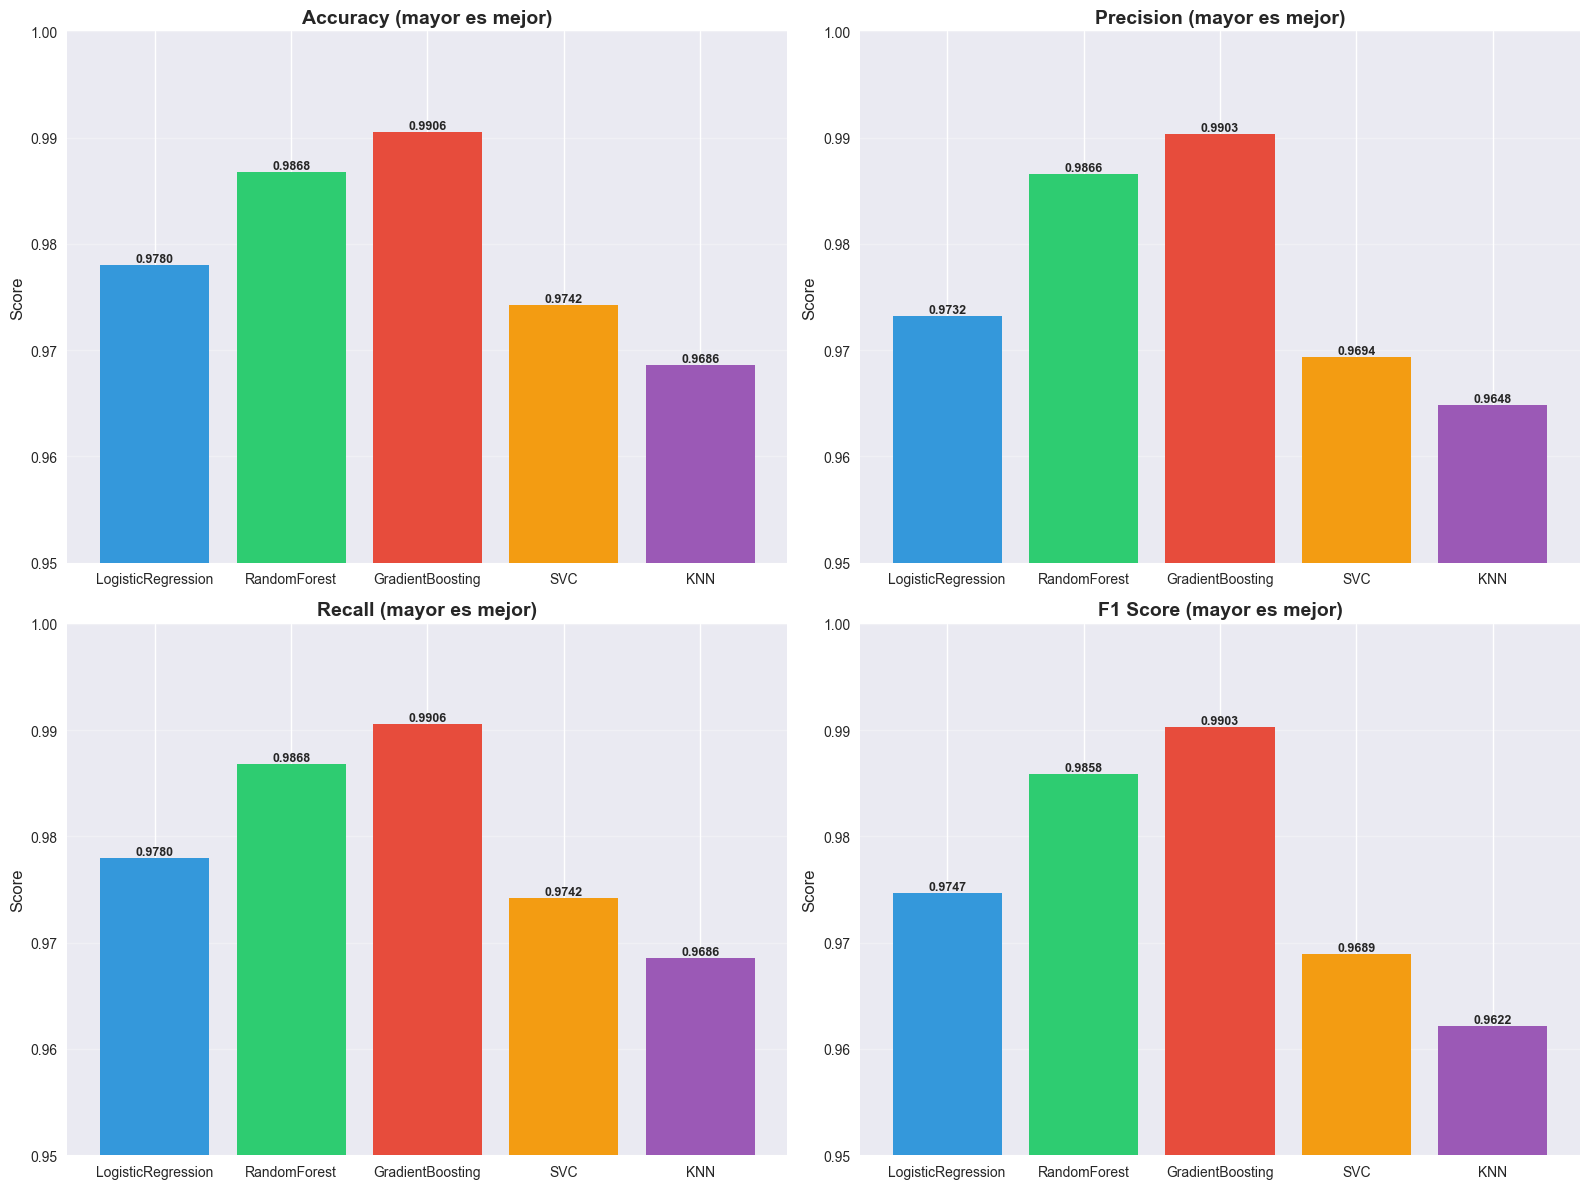

In [4]:
comparacion = analisis_clf['comparacion_modelos']

print("=" * 80)
print("🏆 COMPARACIÓN DE MODELOS")
print("=" * 80)
print(f"\n🥇 Mejor Accuracy: {comparacion['mejor_accuracy']['modelo']} ({comparacion['mejor_accuracy']['score']:.4f})")
print(f"🥇 Mejor Precision: {comparacion['mejor_precision']['modelo']} ({comparacion['mejor_precision']['score']:.4f})")
print(f"🥇 Mejor Recall: {comparacion['mejor_recall']['modelo']} ({comparacion['mejor_recall']['score']:.4f})")
print(f"🥇 Mejor F1: {comparacion['mejor_f1']['modelo']} ({comparacion['mejor_f1']['score']:.4f})")

# Visualización comparativa
modelos = list(analisis_clf['modelos'].keys())
accuracies = [analisis_clf['modelos'][m]['metricas']['accuracy'] for m in modelos]
precisions = [analisis_clf['modelos'][m]['metricas']['precision'] for m in modelos]
recalls = [analisis_clf['modelos'][m]['metricas']['recall'] for m in modelos]
f1_scores = [analisis_clf['modelos'][m]['metricas']['f1'] for m in modelos]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Accuracy
axes[0,0].bar(modelos, accuracies, color=['#3498DB', '#2ECC71', '#E74C3C', '#F39C12', '#9B59B6'])
axes[0,0].set_title('Accuracy (mayor es mejor)', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('Score', fontsize=12)
axes[0,0].grid(axis='y', alpha=0.3)
axes[0,0].set_ylim([0.95, 1.0])
for i, v in enumerate(accuracies):
    axes[0,0].text(i, v, f'{v:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Precision
axes[0,1].bar(modelos, precisions, color=['#3498DB', '#2ECC71', '#E74C3C', '#F39C12', '#9B59B6'])
axes[0,1].set_title('Precision (mayor es mejor)', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('Score', fontsize=12)
axes[0,1].grid(axis='y', alpha=0.3)
axes[0,1].set_ylim([0.95, 1.0])
for i, v in enumerate(precisions):
    axes[0,1].text(i, v, f'{v:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Recall
axes[1,0].bar(modelos, recalls, color=['#3498DB', '#2ECC71', '#E74C3C', '#F39C12', '#9B59B6'])
axes[1,0].set_title('Recall (mayor es mejor)', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('Score', fontsize=12)
axes[1,0].grid(axis='y', alpha=0.3)
axes[1,0].set_ylim([0.95, 1.0])
for i, v in enumerate(recalls):
    axes[1,0].text(i, v, f'{v:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# F1 Score
axes[1,1].bar(modelos, f1_scores, color=['#3498DB', '#2ECC71', '#E74C3C', '#F39C12', '#9B59B6'])
axes[1,1].set_title('F1 Score (mayor es mejor)', fontsize=14, fontweight='bold')
axes[1,1].set_ylabel('Score', fontsize=12)
axes[1,1].grid(axis='y', alpha=0.3)
axes[1,1].set_ylim([0.95, 1.0])
for i, v in enumerate(f1_scores):
    axes[1,1].text(i, v, f'{v:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()


In [5]:
modelos_data = analisis_clf['modelos']

print("=" * 80)
print("📊 ANÁLISIS DETALLADO POR MODELO")
print("=" * 80)

for nombre_modelo, datos_modelo in modelos_data.items():
    print(f"\n{'='*80}")
    print(f"🤖 {nombre_modelo}")
    print(f"{'='*80}")
    
    metricas = datos_modelo['metricas']
    print(f"\n📊 Métricas:")
    print(f"  - Accuracy: {metricas['accuracy']:.4f} ({datos_modelo['interpretacion']['accuracy']})")
    print(f"  - Precision: {metricas['precision']:.4f} ({datos_modelo['interpretacion']['precision']})")
    print(f"  - Recall: {metricas['recall']:.4f} ({datos_modelo['interpretacion']['recall']})")
    print(f"  - F1 Score: {metricas['f1']:.4f} ({datos_modelo['interpretacion']['f1']})")
    
    if datos_modelo['mejores_parametros']:
        print(f"\n⚙️  Mejores parámetros: {datos_modelo['mejores_parametros']}")
    
    if datos_modelo['score_cv']:
        print(f"📈 Score CV: {datos_modelo['score_cv']:.4f}")


📊 ANÁLISIS DETALLADO POR MODELO

🤖 LogisticRegression

📊 Métricas:
  - Accuracy: 0.9780 (97.80% de predicciones correctas)
  - Precision: 0.9732 (97.32% de precisión en predicciones positivas)
  - Recall: 0.9780 (97.80% de casos positivos encontrados)
  - F1 Score: 0.9747 (F1 Score de 0.9747 (balance entre precisión y recall))

⚙️  Mejores parámetros: {'C': 0.01}
📈 Score CV: 0.9766

🤖 RandomForest

📊 Métricas:
  - Accuracy: 0.9868 (98.68% de predicciones correctas)
  - Precision: 0.9866 (98.66% de precisión en predicciones positivas)
  - Recall: 0.9868 (98.68% de casos positivos encontrados)
  - F1 Score: 0.9858 (F1 Score de 0.9858 (balance entre precisión y recall))

⚙️  Mejores parámetros: {'n_estimators': 200}
📈 Score CV: 0.9870

🤖 GradientBoosting

📊 Métricas:
  - Accuracy: 0.9906 (99.06% de predicciones correctas)
  - Precision: 0.9903 (99.03% de precisión en predicciones positivas)
  - Recall: 0.9906 (99.06% de casos positivos encontrados)
  - F1 Score: 0.9903 (F1 Score de 0.9903

## 6. Distribución de Clases


📊 DISTRIBUCIÓN DE CLASES

📈 Entrenamiento:
  - Clase 0: 6,104 muestras (95.93%)
  - Clase 1: 250 muestras (3.93%)
  - Clase 2: 9 muestras (0.14%)

📉 Prueba:
  - Clase 0: 1,518 muestras (95.41%)
  - Clase 1: 68 muestras (4.27%)
  - Clase 2: 5 muestras (0.31%)


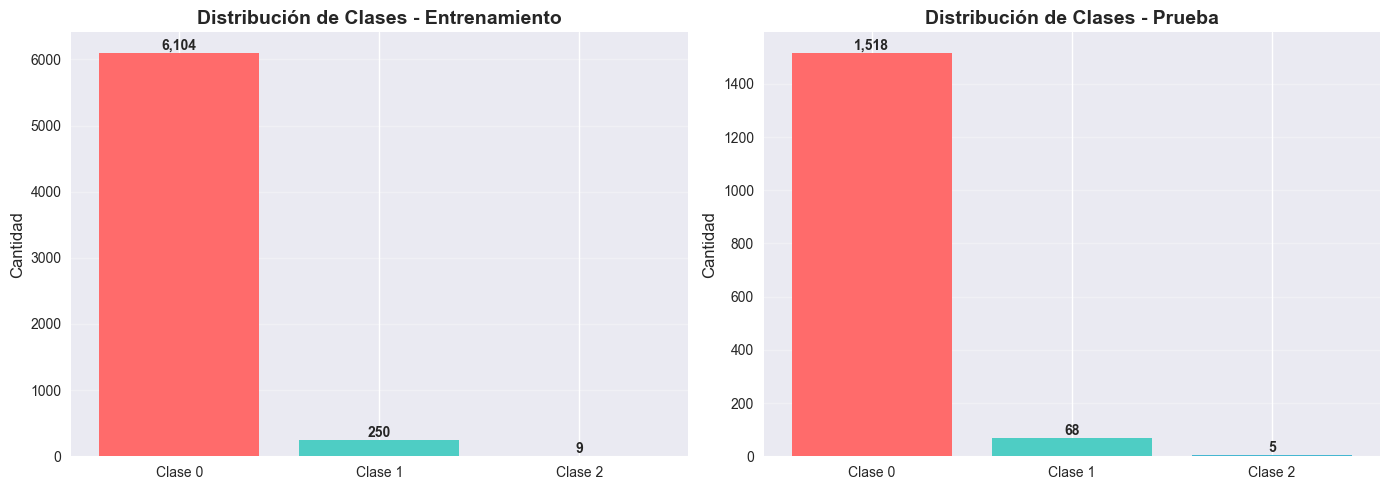


⚖️  Balanceo de clases:
  - Clase mayoritaria: 6,104
  - Clase minoritaria: 9
  - Ratio de desequilibrio: 678.22:1


In [6]:
prep_datos = analisis_clf['preparacion_datos']

print("=" * 80)
print("📊 DISTRIBUCIÓN DE CLASES")
print("=" * 80)

print(f"\n📈 Entrenamiento:")
dist_train = prep_datos['distribucion_clases_entrenamiento']
for clase, count in sorted(dist_train.items()):
    porcentaje = (count / analisis_clf['resumen_general']['muestras_entrenamiento']) * 100
    print(f"  - Clase {clase}: {count:,} muestras ({porcentaje:.2f}%)")

print(f"\n📉 Prueba:")
dist_test = prep_datos['distribucion_clases_prueba']
for clase, count in sorted(dist_test.items()):
    porcentaje = (count / analisis_clf['resumen_general']['muestras_prueba']) * 100
    print(f"  - Clase {clase}: {count:,} muestras ({porcentaje:.2f}%)")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribución entrenamiento
clases_train = sorted(dist_train.keys())
counts_train = [dist_train[c] for c in clases_train]
axes[0].bar([f'Clase {c}' for c in clases_train], counts_train, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0].set_title('Distribución de Clases - Entrenamiento', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Cantidad', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(counts_train):
    axes[0].text(i, v, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Distribución prueba
clases_test = sorted(dist_test.keys())
counts_test = [dist_test[c] for c in clases_test]
axes[1].bar([f'Clase {c}' for c in clases_test], counts_test, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[1].set_title('Distribución de Clases - Prueba', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Cantidad', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(counts_test):
    axes[1].text(i, v, f'{v:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Balanceo de clases
if 'balanceo_clases' in prep_datos and 'entrenamiento' in prep_datos['balanceo_clases']:
    balanceo = prep_datos['balanceo_clases']['entrenamiento']
    print(f"\n⚖️  Balanceo de clases:")
    print(f"  - Clase mayoritaria: {balanceo.get('clase_mayoritaria', 'N/A'):,}" if isinstance(balanceo.get('clase_mayoritaria'), int) else f"  - Clase mayoritaria: {balanceo.get('clase_mayoritaria', 'N/A')}")
    print(f"  - Clase minoritaria: {balanceo.get('clase_minoritaria', 'N/A'):,}" if isinstance(balanceo.get('clase_minoritaria'), int) else f"  - Clase minoritaria: {balanceo.get('clase_minoritaria', 'N/A')}")
    print(f"  - Ratio de desequilibrio: {balanceo.get('ratio_desequilibrio', 'N/A'):.2f}:1" if isinstance(balanceo.get('ratio_desequilibrio'), (int, float)) else f"  - Ratio de desequilibrio: {balanceo.get('ratio_desequilibrio', 'N/A')}:1")


## 7. Recomendaciones


In [7]:
recomendaciones = analisis_clf.get('recomendaciones', {})

print("=" * 80)
print("💡 RECOMENDACIONES")
print("=" * 80)

if 'mejor_modelo_general' in recomendaciones:
    print(f"\n🏆 Mejor modelo general: {recomendaciones['mejor_modelo_general']}")
if 'mejor_para_produccion' in recomendaciones:
    print(f"🚀 Mejor para producción: {recomendaciones['mejor_para_produccion']}")

# Generar observaciones automáticamente si no existen
observaciones = recomendaciones.get('observaciones', [])

# Agregar observaciones automáticas basadas en métricas
comparacion = analisis_clf.get('comparacion_modelos', {})
if comparacion:
    mejor_f1 = comparacion.get('mejor_f1', {})
    mejor_acc = comparacion.get('mejor_accuracy', {})
    
    if mejor_f1:
        observaciones.append(f"El mejor modelo según F1 Score es {mejor_f1.get('modelo', 'N/A')} con {mejor_f1.get('score', 0):.4f}.")
    if mejor_acc:
        observaciones.append(f"El mejor modelo según Accuracy es {mejor_acc.get('modelo', 'N/A')} con {mejor_acc.get('score', 0):.4f}.")
    
    # Análisis de rendimiento general
    if 'modelos' in analisis_clf:
        accuracies = [m.get('metricas', {}).get('accuracy', 0) for m in analisis_clf['modelos'].values()]
        if accuracies and min(accuracies) > 0.96:
            observaciones.append(f"Todos los modelos tienen Accuracy > 96%, indicando buen rendimiento general.")
        if accuracies and max(accuracies) > 0.99:
            observaciones.append(f"El mejor modelo alcanza más del 99% de accuracy, excelente rendimiento.")

# Análisis de balanceo de clases
prep_datos = analisis_clf.get('preparacion_datos', {})
if 'balanceo_clases' in prep_datos and 'entrenamiento' in prep_datos['balanceo_clases']:
    ratio = prep_datos['balanceo_clases']['entrenamiento'].get('ratio_desequilibrio', 0)
    if ratio > 3:
        observaciones.append(f"Existe un desequilibrio significativo de clases ({ratio:.2f}:1), considerar técnicas de balanceo.")

print(f"\n📝 Observaciones:")
if observaciones:
    for i, obs in enumerate(observaciones, 1):
        print(f"  {i}. {obs}")
else:
    print("  No hay observaciones adicionales registradas.")

print("\n" + "=" * 80)
print("✅ Análisis del Pipeline de Clasificación Completado")
print("=" * 80)


💡 RECOMENDACIONES

🏆 Mejor modelo general: GradientBoosting
🚀 Mejor para producción: GradientBoosting

📝 Observaciones:
  1. El mejor modelo según F1 Score es GradientBoosting con 0.9903
  2. El mejor modelo según Accuracy es GradientBoosting con 0.9906
  3. Todos los modelos tienen Accuracy > 96%, indicando buen rendimiento general
  4. GradientBoosting y RandomForest muestran los mejores resultados (F1 > 98%)
  5. El desequilibrio de clases es 678.22:1
  6. El mejor modelo según F1 Score es GradientBoosting con 0.9903.
  7. El mejor modelo según Accuracy es GradientBoosting con 0.9906.
  8. Todos los modelos tienen Accuracy > 96%, indicando buen rendimiento general.
  9. El mejor modelo alcanza más del 99% de accuracy, excelente rendimiento.
  10. Existe un desequilibrio significativo de clases (678.22:1), considerar técnicas de balanceo.

✅ Análisis del Pipeline de Clasificación Completado


In [ ]:
session.close()
print("✅ Sesión de Kedro cerrada")
